# Geospatial Data Visualization: _Basic-Fit_ en _Fit For Free_

## 1. Geopandas

### Imports and version info

In [1]:
# import modules and version info
import sys
print(f'python     {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

import pandas as pd
print(f'pandas     {pd.__version__}')

import geopandas as gpd
print(f'geopandas  {gpd.__version__}')

import matplotlib.pyplot as plt
print(f'matplotlib {sys.modules["matplotlib"].__version__}')

from shapely.geometry import Point
print(f'shapely    {sys.modules["shapely"].__version__}')

import folium # conda install -c conda-forge folium
from folium.plugins import MarkerCluster
print(f'folium     {folium.__version__}')

python     3.6.6
pandas     0.23.4
geopandas  0.4.0
matplotlib 2.2.2
shapely    1.6.4.post2
folium     0.7.0


### Inlezen locaties sportscholen

In [2]:
# Inlezen data
gym = pd.read_csv('../data/gym_geo.csv', sep=';')
gym.columns = ['keten', 'adres', 'longitude', 'latitude']

In [3]:
# Inspect Data
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
keten        254 non-null object
adres        254 non-null object
longitude    254 non-null float64
latitude     254 non-null float64
dtypes: float64(2), object(2)
memory usage: 8.0+ KB


In [4]:
# Toon data
pd.concat([gym.head(3), gym.tail(3)])

keten                                  adres  longitude   latitude
0       Basic-Fit      Molenvlietweg 18, 1432GW AALSMEER   4.777903  52.266150
1       Basic-Fit       Terborchlaan 299, 1816MH ALKMAAR   4.714559  52.633571
2       Basic-Fit  Oosterweezenstraat 15, 1823CN ALKMAAR   4.751788  52.635070
251  Fit For Free               Scheglaan 12, Zoetermeer   4.488859  52.034732
252  Fit For Free      H.A. Lorentzstraat 9, Zwijndrecht   4.630633  51.818347
253  Fit For Free               Ceintuurbaan 34A, Zwolle   6.118634  52.521736

### Inlezen shapefile

In [5]:
# Inlezen shapefile met gemeentegrenzen
gg = gpd.read_file('../shapefiles/2018-Imergis_gemeentegrenzen_kustlijn.dbf')

In [6]:
# Informatie
gg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
id            380 non-null int64
code          380 non-null object
gemeentena    380 non-null object
geometry      380 non-null object
dtypes: int64(1), object(3)
memory usage: 12.0+ KB


In [7]:
# Hernoem kolommen
gg.columns = ['id', 'code', 'gemeentenaam', 'geometry']
pd.concat([gym.head(3), gym.tail(3)])

keten                                  adres  longitude   latitude
0       Basic-Fit      Molenvlietweg 18, 1432GW AALSMEER   4.777903  52.266150
1       Basic-Fit       Terborchlaan 299, 1816MH ALKMAAR   4.714559  52.633571
2       Basic-Fit  Oosterweezenstraat 15, 1823CN ALKMAAR   4.751788  52.635070
251  Fit For Free               Scheglaan 12, Zoetermeer   4.488859  52.034732
252  Fit For Free      H.A. Lorentzstraat 9, Zwijndrecht   4.630633  51.818347
253  Fit For Free               Ceintuurbaan 34A, Zwolle   6.118634  52.521736

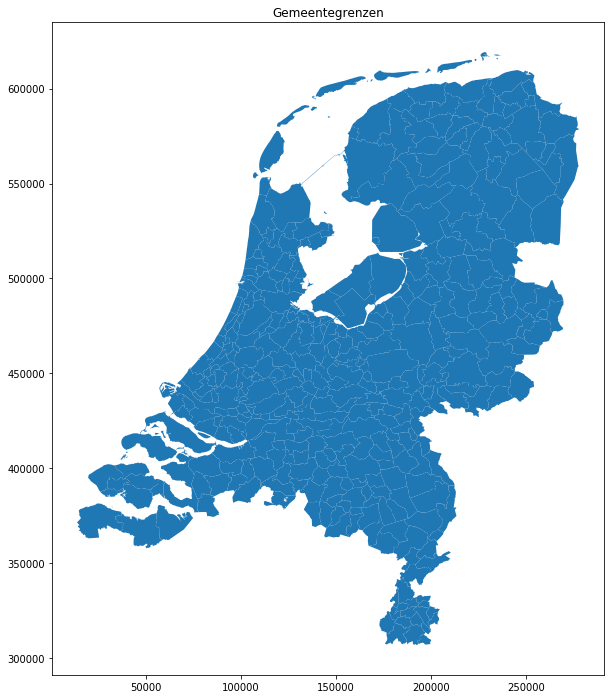

In [8]:
# Plot gemeentegrenzen
gg.plot(figsize=(10, 12))
plt.title('Gemeentegrenzen')
plt.show()

In [9]:
# Toon de details van het Coordinate Reference System van de shapefile
gg.crs

{'proj': 'sterea',
 'lat_0': 52.15616055555555,
 'lon_0': 5.38763888888889,
 'k': 0.9999079,
 'x_0': 155000,
 'y_0': 463000,
 'ellps': 'bessel',
 'units': 'm',
 'no_defs': True}

Zoals je kunt zien is de eenheid (unit) in het coordinate reference system van de ingelezen shapefile gespecificeerd in meters (m).  

De eenheid van de ingelezen data is gespecificeerd in graden (latitude en longitude).  

Om de data te kunnen afbeelden op een kaart, dient deze dezelfde geometische eenheid te hebben als de shapefile.

### Wijzigen van de CRS van de data

##### Stap 1: Creëer een Point geometry kolom

In [10]:
# Point geometry
gym['geometry'] = gym.apply(lambda g: Point((g.longitude, g.latitude)), axis=1)
gym.head()

keten                                  adres  longitude   latitude  \
0  Basic-Fit      Molenvlietweg 18, 1432GW AALSMEER   4.777903  52.266150   
1  Basic-Fit       Terborchlaan 299, 1816MH ALKMAAR   4.714559  52.633571   
2  Basic-Fit  Oosterweezenstraat 15, 1823CN ALKMAAR   4.751788  52.635070   
3  Basic-Fit            Groenplein 2, 7604BG ALMELO   6.628310  52.359735   
4  Basic-Fit          Stadionlaan 34, 7606JZ ALMELO   6.650678  52.338138   

                               geometry  
0   POINT (4.7779031 52.26614960000001)  
1          POINT (4.7145587 52.6335706)  
2  POINT (4.751787999999999 52.6350701)  
3          POINT (6.6283098 52.3597349)  
4          POINT (6.6506776 52.3381375)

In [11]:
# Verwijder de kolommen longitude en latitude
gym.drop(['longitude', 'latitude'], axis=1, inplace=True)

##### Stap 2: Creëer een GeoDataFrame

Voor het `GeoDataFrame` gaan we CRS [EPSG:4326](https://epsg.io/4326).  
Dit _coordinate refence system_ wordt o.a. gebruikt voor GPS en gebruikt graden als eenheid.

In [12]:
# Coordinate Reference System
gym_crs = {'init': 'epsg:4326'}

In [13]:
# GeoDataFrame
gym_geo = gpd.GeoDataFrame(gym, crs=gym_crs, geometry=gym.geometry)
type(gym_geo)

geopandas.geodataframe.GeoDataFrame

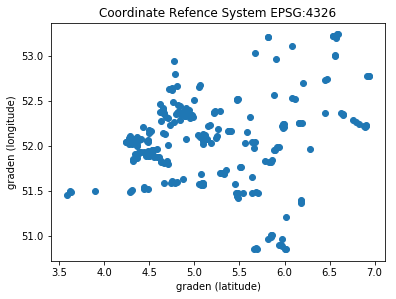

In [14]:
# Plot geometry points
gym_geo.geometry.plot(figsize=(6, 5))
plt.title('Coordinate Refence System EPSG:4326')
plt.xlabel('graden (latitude)')
plt.ylabel('graden (longitude)')
plt.show()

##### Stap 3: Wijzig het CRS

In [15]:
# Wijzig het CRS van de data naar het CRS van de shapefile
gym_geo.geometry = gym_geo.geometry.to_crs(gg.crs)
gym_geo.head()

keten                                  adres  \
0  Basic-Fit      Molenvlietweg 18, 1432GW AALSMEER   
1  Basic-Fit       Terborchlaan 299, 1816MH ALKMAAR   
2  Basic-Fit  Oosterweezenstraat 15, 1823CN ALKMAAR   
3  Basic-Fit            Groenplein 2, 7604BG ALMELO   
4  Basic-Fit          Stadionlaan 34, 7606JZ ALMELO   

                                      geometry  
0  POINT (113382.5779387067 475411.1073226061)  
1  POINT (109439.0620798705 516325.0609048211)  
2   POINT (111960.5409817227 516469.082724638)  
3  POINT (239501.3882215935 486371.0139597536)  
4  POINT (241066.6212142036 483994.8540332345)

>Op de [website](http://www.imergis.nl/asp/47.asp) vanwaar de shapefile is gedownload, staat aangegeven dat coördinaatstelsel [EPSG:28992](https://epsg.io/28992) is gebruikt.  
Daarom is onderstaand statement ook valide.
>
>```python
gym_geo.geometry = gym_geo.geometry.to_crs({'init': 'epsg:28992'})
```

    

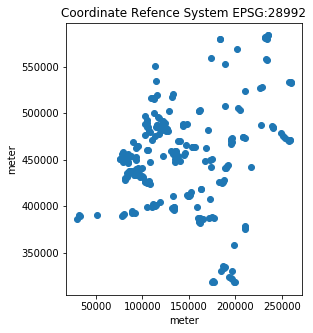

In [16]:
# Plot geometry points
gym_geo.geometry.plot(figsize=(6, 5))
plt.title('Coordinate Refence System EPSG:28992')
plt.xlabel('meter')
plt.ylabel('meter')
plt.show()

### Locaties sportscholen

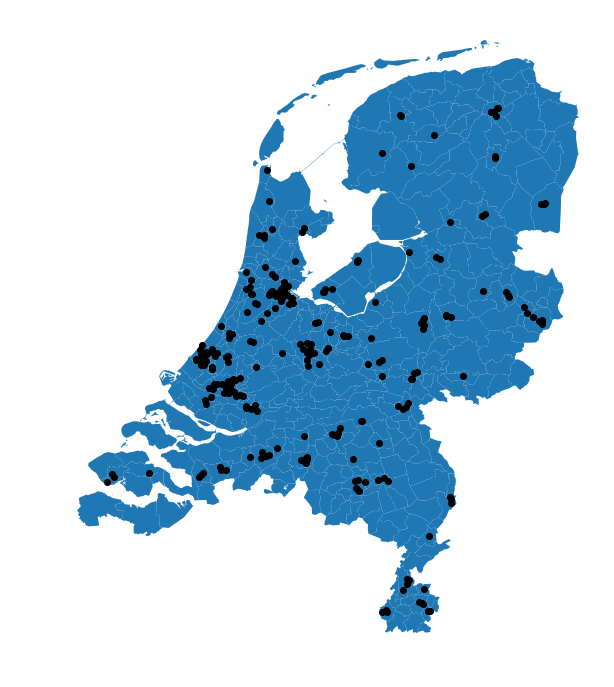

In [17]:
# Basiskaartje
f, ax = plt.subplots(1, figsize=(10, 12))
ax = gg.plot(ax=ax)
gym_geo.geometry.plot(ax=ax, c='black')
plt.axis('off')
plt.show()

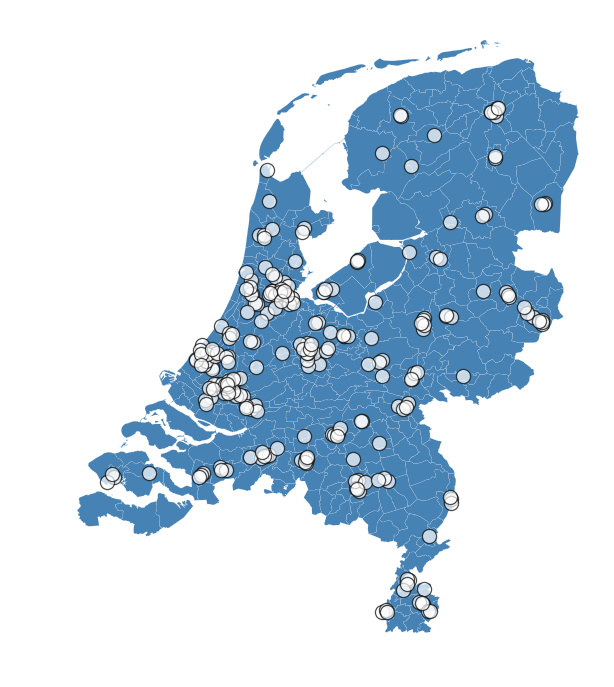

In [18]:
# Verbeterde versie
f, ax = plt.subplots(1, figsize=(10, 12))
ax = gg.plot(ax=ax, color='steelblue', edgecolor='white', linewidth=0.1)
gym_geo.geometry.plot(ax=ax, c='white', edgecolor='black', markersize=200, linewidth=1.25, alpha=0.7)
plt.axis('off')
plt.show()

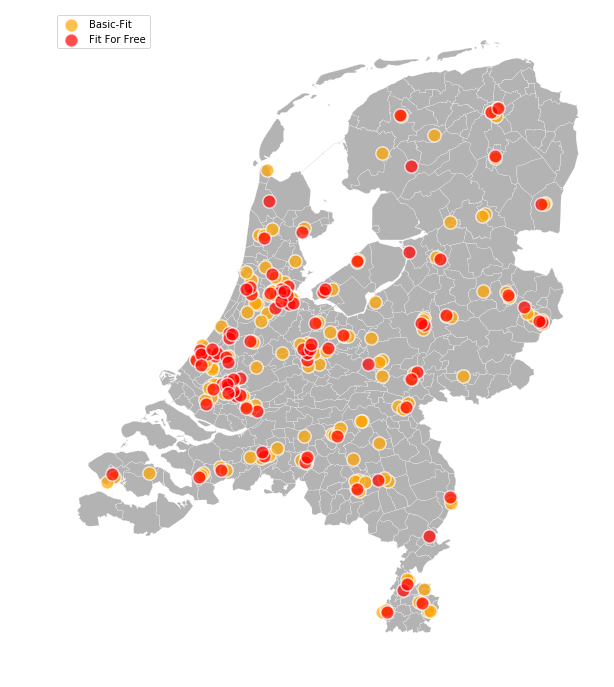

In [19]:
# Basic-Fit en Fit For Free in separate kleuren afgebeeld
bft = gym_geo.loc[gym_geo.keten == 'Basic-Fit']
fff = gym_geo.loc[gym_geo.keten == 'Fit For Free']

f, ax = plt.subplots(1, figsize=(10, 12))
ax = gg.plot(ax=ax, color='#B3B3B3', edgecolor='white', linewidth=0.2)
bft.geometry.plot(ax=ax, label='Basic-Fit', c='orange', edgecolor = 'white', markersize=175, linewidth=1.5, alpha=0.7)
fff.geometry.plot(ax=ax, label='Fit For Free', c='red', edgecolor = 'white', markersize=175, linewidth=1.5, alpha=0.7)
ax.legend(loc='upper left')
plt.axis('off')
plt.show()

### Sportscholen per gemeente

In [20]:
# Spatial join locaties en gemeentegrenzen
intersect = gpd.sjoin(gym_geo, gg, op = 'intersects')
intersect.head()

keten                                  adres  \
0       Basic-Fit      Molenvlietweg 18, 1432GW AALSMEER   
95      Basic-Fit    Wim Kan Dreef 5, 1433HM KUDELSTAART   
1       Basic-Fit       Terborchlaan 299, 1816MH ALKMAAR   
2       Basic-Fit  Oosterweezenstraat 15, 1823CN ALKMAAR   
160  Fit For Free               Vondelstraat 39, Alkmaar   

                                        geometry  index_right   id  code  \
0    POINT (113382.5779387067 475411.1073226061)          104  134  0358   
95   POINT (110251.4047051893 471279.2518452345)          104  134  0358   
1    POINT (109439.0620798705 516325.0609048211)           17   33  0361   
2     POINT (111960.5409817227 516469.082724638)           17   33  0361   
160  POINT (112004.2707577127 514866.3347649633)           17   33  0361   

    gemeentenaam  
0       Aalsmeer  
95      Aalsmeer  
1        Alkmaar  
2        Alkmaar  
160      Alkmaar

In [21]:
# Aantal sportscholen per gemeente (positieve aantallen)
aantal_pos = intersect[['id', 'gemeentenaam']].groupby('gemeentenaam').size().sort_values(ascending=False)
aantal_pos.head(10)

gemeentenaam
Amsterdam        23
Rotterdam        18
's-Gravenhage    12
Utrecht           9
Tilburg           6
Groningen         6
Apeldoorn         5
Eindhoven         5
Enschede          5
Haarlem           5
dtype: int64

In [22]:
# Gemeenten zonder sportschool
aantal_nul = pd.Series(0, index=gg.loc[~gg.gemeentenaam.isin(aantal_pos.index), 'gemeentenaam'])
aantal_nul.head()

gemeentenaam
Oud-Beijerland    0
Hardenberg        0
Leusden           0
Krimpenerwaard    0
Westerveld        0
dtype: int64

In [23]:
# Voeg pandas Series samen in een DataFrame en hernoem de kolommen
aantal = pd.concat([aantal_pos, aantal_nul]).to_frame().reset_index()
aantal.columns=['gemeentenaam', 'aantal']
aantal.sample(n=7)

gemeentenaam  aantal
223          Eersel       0
94   Oud-Beijerland       0
230      Oegstgeest       0
252  Noord-Beveland       0
377         Someren       0
210       Maasdriel       0
250         Landerd       0

In [24]:
# Merge shapefile met aantal (let op volgorde argumenten!)
gdf = pd.merge(gg, aantal, on='gemeentenaam')
gdf.sample(n=7)

id  code      gemeentenaam  \
79   110  0870         Werkendam   
74   105  1699       Noordenveld   
67    63  0362        Amstelveen   
163  139  0106             Assen   
224  193  0479          Zaanstad   
295  289  1884  Kaag en Braassem   
302  296  0984            Venray   

                                              geometry  aantal  
79   POLYGON ((118120.432 418140.284, 118119.383 41...       0  
74   POLYGON ((229121.117 579624.313, 229128.989 57...       0  
67   POLYGON ((121707.245 479063.336, 121719.056 47...       1  
163  POLYGON ((230561.895 558768.879, 230561.57 558...       2  
224  POLYGON ((111044.533 501751.568, 111046.52 501...       3  
295  POLYGON ((104230.4 470540.038, 104255.456 4705...       0  
302  POLYGON ((199697.72 396129.165, 199700.446 396...       0

>De volgorde van de argumenten is hier belangrijk!  
Het resulaat van de merge krijgt het datatype van het eerste argument.  
>
>Omdat we een GeoDataFrame willen als resultaat, dient GeoDataFrame `gg` als eerste argument meegegeven te worden en DataFrame `aantal` als tweede argument.

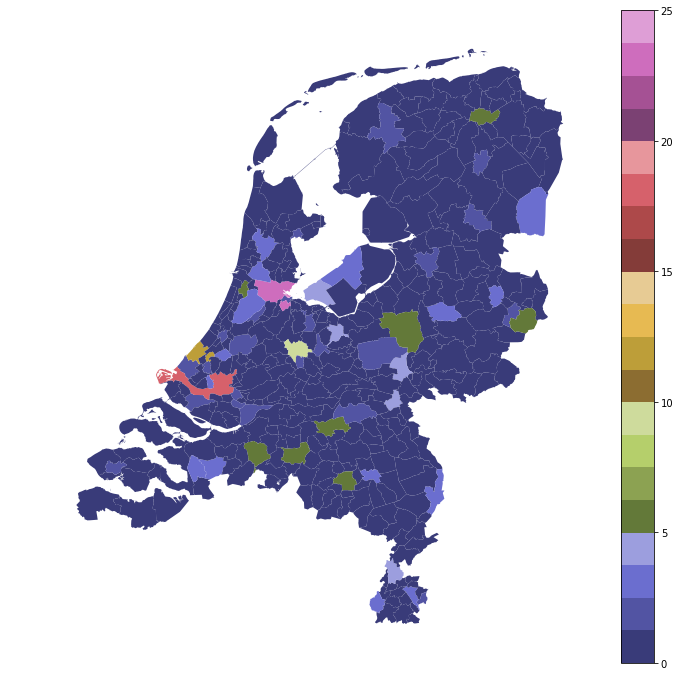

In [25]:
# Aantal sportscholen per gemeente
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gdf.plot(ax=ax, column='aantal', cmap='tab20b', vmax=25, legend=True)
plt.axis('off')
plt.show()

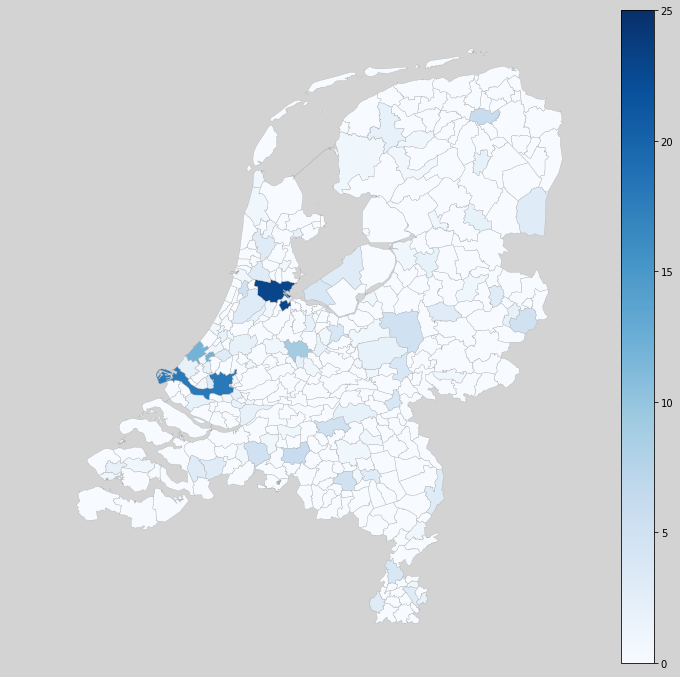

In [26]:
# Aantal sportscholen per gemeente
f, ax = plt.subplots(1, figsize=(12, 12), facecolor='lightgrey')
ax = gdf.plot(ax=ax, column='aantal', cmap='Blues', vmax=25, legend=True, edgecolor='darkgrey', linewidth=0.3)
plt.axis('off')
plt.show()

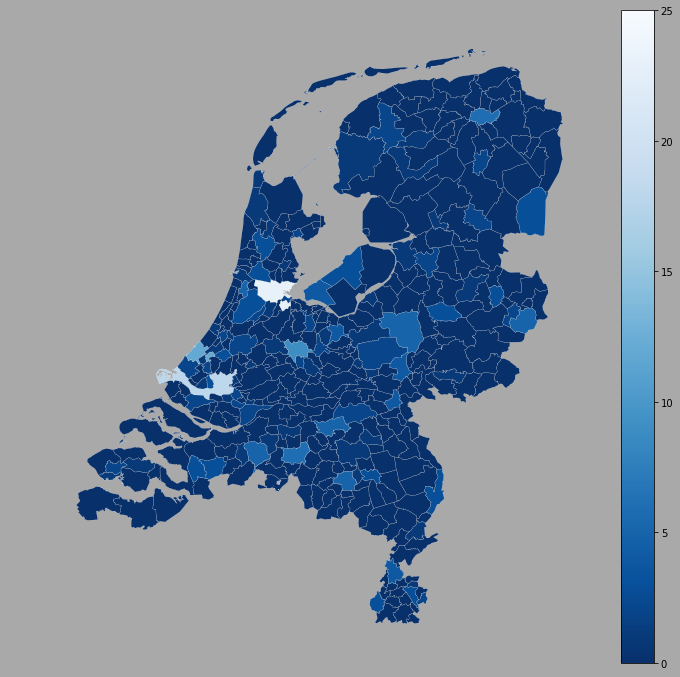

In [27]:
# Aantal sportscholen per gemeente, reversed colommap
f, ax = plt.subplots(1, figsize=(12, 12), facecolor='darkgrey')
ax = gdf.plot(ax=ax, column='aantal', cmap='Blues_r', vmax=25, legend=True, edgecolor='white', linewidth=0.15)
plt.axis('off')
plt.show()

### Oppervlakte gemeente in km$^2$

In [28]:
# Voeg oppervlakte in vierkant kilometer toe
gdf['oppervlakte'] = gdf.apply(lambda x: x.geometry.area / 1000**2, axis=1)

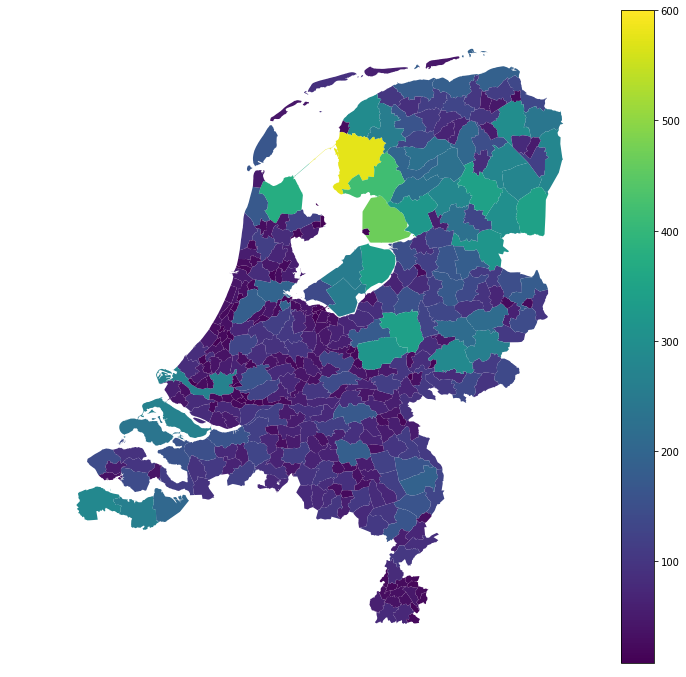

In [29]:
# Oppervlakte per gemeente, defaul colormap
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gdf.plot(ax=ax, column='oppervlakte', vmax=int(round(gdf.oppervlakte.max(), -2)), legend=True)
plt.axis('off')
plt.show()

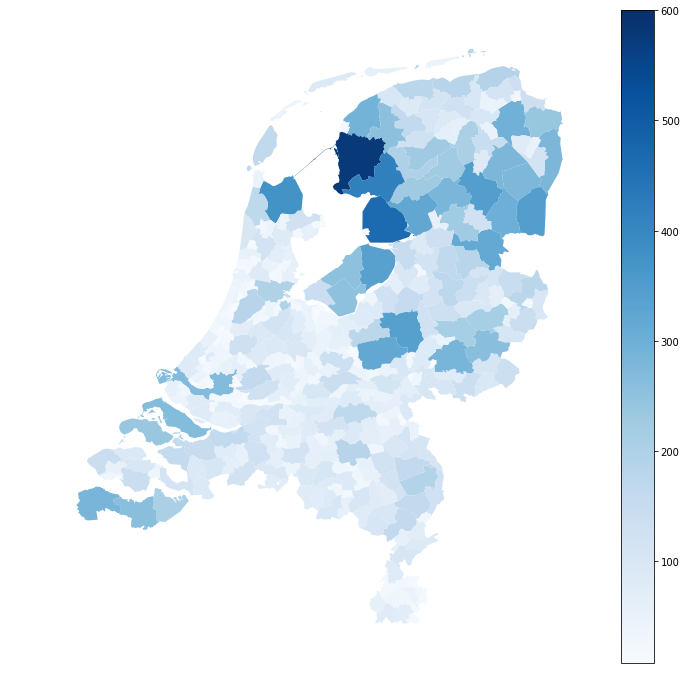

In [30]:
# Oppervlakte per gemeente, custom colormap
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gdf.plot(ax=ax, column='oppervlakte', cmap='Blues', vmax=int(round(gdf.oppervlakte.max(), -2)), legend=True)
plt.axis('off')
plt.show()

### Aantal sportscholen per vierkante kilometer (sportschooldichtheid per gemeente)

In [31]:
# Voeg dichtheid toe
gdf['dichtheid'] = gdf.apply(lambda x: x.aantal / x.oppervlakte, axis=1)

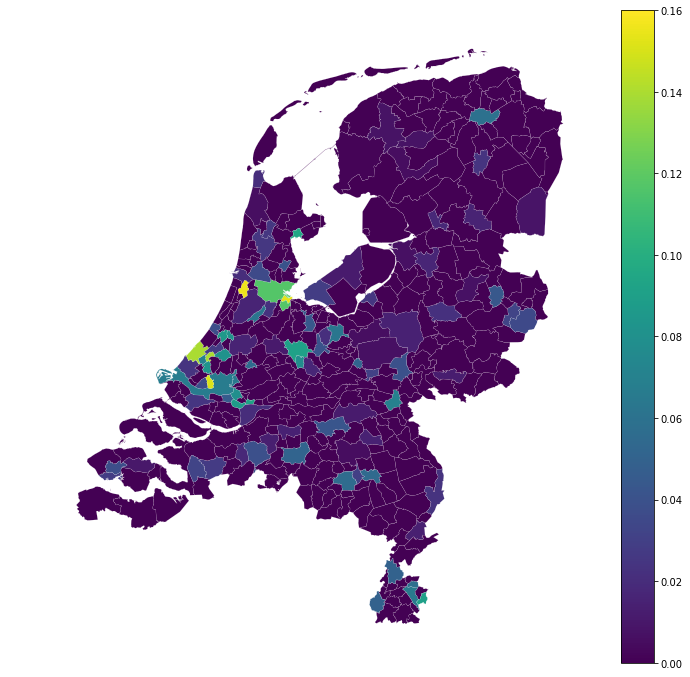

In [32]:
# Aantal sportscholen per vierkante kilometer (sportschooldichtheid per gemeente)
f, ax = plt.subplots(1, figsize=(12, 12), facecolor='white')
ax = gdf.plot(ax=ax,
              column='dichtheid',
              cmap='viridis',
              vmax=round(gdf.dichtheid.max(), 2),
              legend=True,
              edgecolor='white',
              linewidth=0.1)
plt.axis('off')
plt.show()

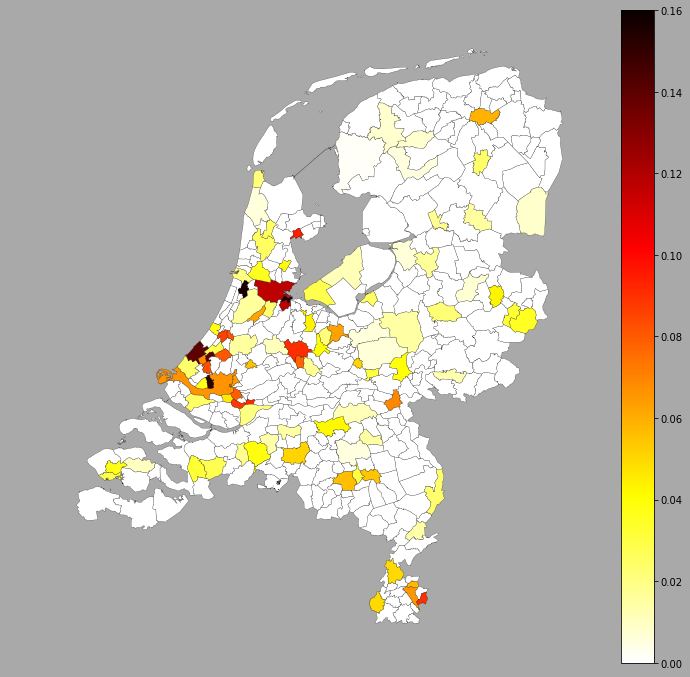

In [33]:
# Aantal sportscholen per vierkante kilometer (sportschooldichtheid per gemeente)
f, ax = plt.subplots(1, figsize=(12, 12), facecolor='darkgrey')
ax = gdf.plot(ax=ax,
              column='dichtheid',
              cmap='hot_r',
              vmax=round(gdf.dichtheid.max(), 2),
              legend=True,
              edgecolor='black',
              linewidth=0.2)
plt.axis('off')
plt.show()

### Gemeenten met minimaal drie sportscholen

Om deze kaart te maken, plotten we eerst een 'lege' kaart met alleen de gemeentegrenzen.  
Daar overheen plotten we de laag met gemeenten met meer dan drie sportscholen.

In [34]:
# Gemeenten met minimaal drie sportscholen
gdf_drie = gdf[gdf.aantal >= 3]

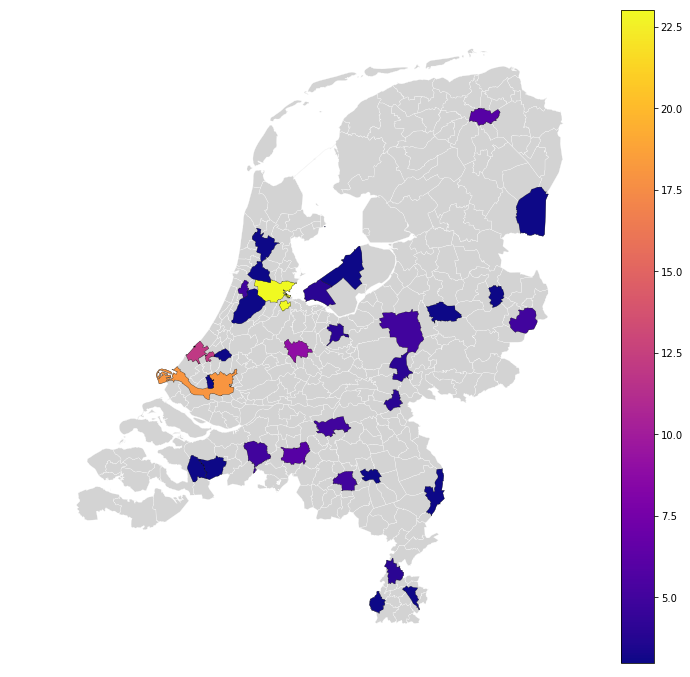

In [35]:
# Aantal sportscholen per gemeente
f, ax = plt.subplots(1, figsize=(12, 12), facecolor='white')
ax = gdf.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.25)
ax = gdf_drie.plot(ax=ax, column='aantal', cmap='plasma', legend=True, edgecolor='black', linewidth=0.3)
plt.axis('off')
plt.show()

## 2. Folium

Het pakket `folium` werkt met GPS coordinaten.  
Daarom passen we eerste weer het CRS aan!

In [36]:
# Wijzig CRS
gym_geo = gym_geo.to_crs({'init': 'epsg:4326'})
gdf = gdf.to_crs({'init': 'epsg:4326'})

### Gemeenten met minimaal 5 sportscholen

In [37]:
# Gemeenten met minimaal 5 sportscholen
gdf_vijf = gdf[gdf.aantal >= 5]

In [38]:
# Create map
m = folium.Map(location = [52.155, 5.005], zoom_start = 9)

# Add choropleth
folium.Choropleth(
    geo_data = gdf_vijf,
    name = 'geometry',
    data = gdf_vijf,
    columns = ['gemeentenaam', 'aantal'],
    key_on = 'feature.properties.gemeentenaam',
    fill_color = 'Reds', # for valid fill_colors, visit http://colorbrewer2.org
    fill_opacity = 0.7,
    line_opacity = 0.8,
    legend_name = 'Aantal sportscholen',
    reset = True).add_to(m)

# Display map
display(m)

### Gemeenten met een hogere sportschooldichtheid dan Nieuwegein

In [39]:
# Gemeenten met meer sportscholen per vierkante kilometer dan Nieuwegein
gdf_dichter = gdf[gdf.dichtheid > gdf.loc[gdf.gemeentenaam == 'Nieuwegein', 'dichtheid'].values[0]]

In [40]:
# Create map
m = folium.Map(location = [52.267, 5.222], zoom_start = 9)

# Add choropleth
folium.Choropleth(
    geo_data = gdf_dichter,
    name = 'geometry',
    data = gdf_dichter,
    columns = ['gemeentenaam', 'dichtheid'],
    key_on = 'feature.properties.gemeentenaam',
    fill_color = 'Reds', # for valid fill_colors, visit http://colorbrewer2.org
    fill_opacity = 0.9,
    line_opacity = 0.9,
    legend_name = 'Aantal sportscholen per vierkante kilometer',
    reset = True).add_to(m)

# Display map
display(m)

### Sportscholen in Noord-Holland

In [41]:
# Gemeenten in Noord-Holland
prov_nh = ['Aalsmeer', 'Alkmaar', 'Amstelveen', 'Amsterdam', 'Beemster', 'Bergen', 'Beverwijk', 'Blaricum',
           'Bloemendaal', 'Castricum', 'Den Helder', 'Diemen', 'Drechterland', 'Edam-Volendam', 'Enkhuizen',
           'Gooise Meren', 'Haarlem', 'Haarlemmerliede en Spaarnwoude', 'Haarlemmermeer', 'Heemskerk',
           'Heemstede', 'Heerhugowaard', 'Heiloo', 'Hilversum', 'Hollands Kroon', 'Hoorn', 'Huizen',
           'Koggenland', 'Landsmeer', 'Langedijk', 'Laren', 'Medemblik', 'Oostzaan', 'Opmeer', 'Ouder-Amstel',
           'Purmerend', 'Schagen', 'Stede Broec', 'Texel', 'Uitgeest', 'Uithoorn', 'Velsen', 'Waterland',
           'Weesp', 'Wijdemeren', 'Wormerland', 'Zaanstad', 'Zandvoort']

In [42]:
# Gemeenten met sportscholen in Noord-Holand
gdf_nh = gdf[gdf.gemeentenaam.isin(prov_nh) & gdf.aantal != 0]

In [43]:
# Create map
m = folium.Map(location = [52.552, 5.150], zoom_start = 9)

# Add choropleth
folium.Choropleth(
    geo_data = gdf_nh,
    name = 'geometry',
    data = gdf_nh,
    columns = ['gemeentenaam', 'aantal'],
    threshold_scale = [i for i in range(0, 27, 5)],
    key_on = 'feature.properties.gemeentenaam',
    fill_color = 'YlGnBu', # for valid fill_colors, visit http://colorbrewer2.org
    fill_opacity = 0.9,
    line_opacity = 0.7,
    legend_name = 'Aantal sportscholen',
    reset = True).add_to(m)

# Display map
display(m)

### Markers

In [44]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 7)

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    marker = folium.Marker(location = location)
    marker.add_to(m)

# Display map
display(m)

### Marker clusters

In [45]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 7)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    marker = folium.Marker(location = location)
    marker.add_to(marker_cluster)

# Display map
display(m)

### Marker colors

In [46]:
# Gym attributes (dict of dicts)
attribs = {'Basic-Fit'   : {'kleur': 'orange'},
           'Fit For Free': {'kleur': 'red'}}

In [47]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 12)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    keten = row_values.keten
    marker = folium.Marker(location = location,
                           icon = folium.Icon(color = attribs[keten]['kleur']))
    marker.add_to(marker_cluster)

# Display map
display(m)

### Marker icon

In [48]:
# Gym attributes (dict of dicts)
attribs = {'Basic-Fit'   : {'kleur': 'orange'},
           'Fit For Free': {'kleur': 'red'}}

In [49]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 12)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    keten = row_values.keten
    marker = folium.Marker(location = location,
                           icon = folium.Icon(icon = 'heart', 
                                              color = attribs[keten]['kleur']))
    marker.add_to(marker_cluster)

# Display map
display(m)

### Popups

In [50]:
attribs = {'Basic-Fit'   : {'kleur': 'orange',
                            'url': 'www.basic-fit.com'},
           'Fit For Free': {'kleur': 'red',
                            'url': 'https://www.fitforfree.nl'}}

In [51]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 10)

# Add marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    keten = row_values.keten
    adres1 = row_values.adres.split(', ')[0]
    adres2 = row_values.adres.split(', ')[1]
    website = '<a href={0} target="_blank"</a>{0}'.format(attribs[keten]['url'])
    popup = '<b>{}</b><br><i>{}</i><br><i>{}</i><br>{}'.format(keten.upper(), adres1, adres2, website)
    marker = folium.Marker(location = location,
                           icon = folium.Icon(color = attribs[keten]['kleur']),
                           popup = popup)
    marker.add_to(marker_cluster)

# Display map
display(m)

### Feature groups

In [52]:
attribs = {'Basic-Fit'   : {'kleur': 'orange',
                            'url': 'www.basic-fit.com'},
           'Fit For Free': {'kleur': 'red',
                            'url': 'https://www.fitforfree.nl'}}

In [53]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 12)

# Feature groups
fg_bft = folium.FeatureGroup(name = 'Basic-Fit')
fg_fff = folium.FeatureGroup(name = 'Fit For Free')

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    keten = row_values.keten
    adres1 = row_values.adres.split(', ')[0]
    adres2 = row_values.adres.split(', ')[1]
    website = '<a href={0} target="_blank"</a>{0}'.format(attribs[keten]['url'])
    popup = '<b>{}</b><br><i>{}</i><br><i>{}</i><br>{}'.format(keten.upper(), adres1, adres2, website)
    marker = folium.Marker(location = location,
                           icon = folium.Icon(color = attribs[keten]['kleur']),
                           popup = popup)
    if keten == 'Basic-Fit':
        marker.add_to(fg_bft)
    else:
        marker.add_to(fg_fff)

# Add feature groups to map
fg_bft.add_to(m)
fg_fff.add_to(m)

# Add layer control to map
folium.LayerControl(collapsed = False).add_to(m)
 
# Display map
display(m)

### Tile Layers

In [54]:
attribs = {'Basic-Fit'   : {'kleur': 'orange',
                            'url': 'www.basic-fit.com'},
           'Fit For Free': {'kleur': 'red',
                            'url': 'https://www.fitforfree.nl'}}

In [55]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 12)

# Feature groups
fg_bft = folium.FeatureGroup(name = 'Basic-Fit')
fg_fff = folium.FeatureGroup(name = 'Fit For Free')

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    keten = row_values.keten
    adres1 = row_values.adres.split(', ')[0]
    adres2 = row_values.adres.split(', ')[1]
    website = '<a href={0} target="_blank"</a>{0}'.format(attribs[keten]['url'])
    popup = '<b>{}</b><br><i>{}</i><br><i>{}</i><br>{}'.format(keten.upper(), adres1, adres2, website)
    marker = folium.Marker(location = location,
                           icon = folium.Icon(color = attribs[keten]['kleur']),
                           popup = popup)
    if keten == 'Basic-Fit':
        marker.add_to(fg_bft)
    else:
        marker.add_to(fg_fff)

# Add feature groups to map
fg_bft.add_to(m)
fg_fff.add_to(m)

# Add tile layers
m.add_tile_layer(tiles = 'Stamen Terrain', name = 'terrain')
m.add_tile_layer(tiles = 'Stamen Watercolor', name = 'watercolor')
m.add_tile_layer(tiles = 'Stamen Toner', name = 'black & white')

# Add layer control to map
folium.LayerControl(collapsed = False).add_to(m)

# Display map
display(m)

### Custom Icons

In [56]:
attribs = {'Basic-Fit'   : {'url': 'www.basic-fit.com',
                            'icon_url': 'http://res.cloudinary.com/brinkhuis/image/upload/v1512746206/basicfit_wexzjg.png',
                            'icon_size': (84, 28)}, 
           'Fit For Free': {'url': 'https://www.fitforfree.nl',
                            'icon_url': 'http://res.cloudinary.com/brinkhuis/image/upload/v1512745660/fitforfree_wo2t4c.png',
                            'icon_size': (42, 42)}}

In [57]:
# Create map
m = folium.Map(location = [52.0912374, 5.14905414], zoom_start = 12)

# Feature groups
fg_bft = folium.FeatureGroup(name = 'Basic-Fit')
fg_fff = folium.FeatureGroup(name = 'Fit For Free')

# Add marker for each gym
for row in gym_geo.iterrows():
    row_values = row[1]
    location = (row_values.geometry.y, row_values.geometry.x)
    keten = row_values.keten
    adres1 = row_values.adres.split(', ')[0]
    adres2 = row_values.adres.split(', ')[1]
    website = '<a href={0} target="_blank"</a>{0}'.format(attribs[keten]['url'])
    popup = '<b>{}</b><br><i>{}</i><br><i>{}</i><br>{}'.format(keten.upper(), adres1, adres2, website)
    marker = folium.Marker(location = location,
                           icon = folium.features.CustomIcon(attribs[keten]['icon_url'],
                                                             icon_size = attribs[keten]['icon_size']),
                           popup = popup)
    if keten == 'Basic-Fit':
        marker.add_to(fg_bft)
    else:
        marker.add_to(fg_fff)

# Add feature groups to map
fg_bft.add_to(m)
fg_fff.add_to(m)

# Add tile layers
m.add_tile_layer(tiles = 'Stamen Terrain', name = 'terrain')
m.add_tile_layer(tiles = 'Stamen Watercolor', name = 'watercolor')
m.add_tile_layer(tiles = 'Stamen Toner', name = 'black & white')

# Add layer control to map
folium.LayerControl(collapsed = False).add_to(m)

# Display map
display(m)

In [58]:
# Save map
m.save('../output/gyms.html')